In [1]:
# Task 8 - Clustering with KMeans
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [5]:
#  Load dataset
df = pd.read_csv("/Mall_Customers.csv")  # Replace path if needed

In [6]:
#  Check the data
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
# Select useful features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [9]:
#  Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


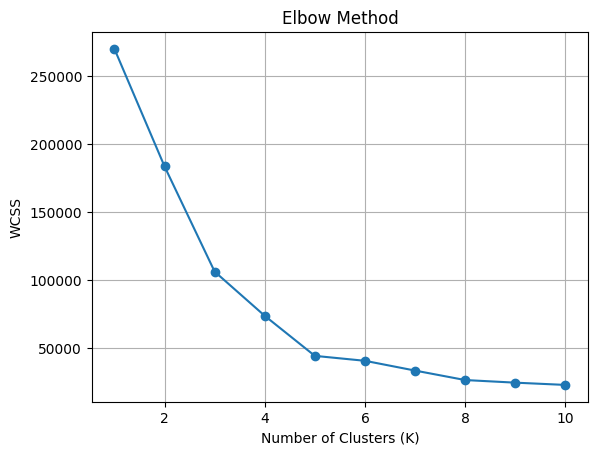

In [10]:
# Plot the Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [11]:
# Apply KMeans with chosen K (e.g., K=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [12]:
# Add cluster to original dataframe
df['Cluster'] = y_kmeans


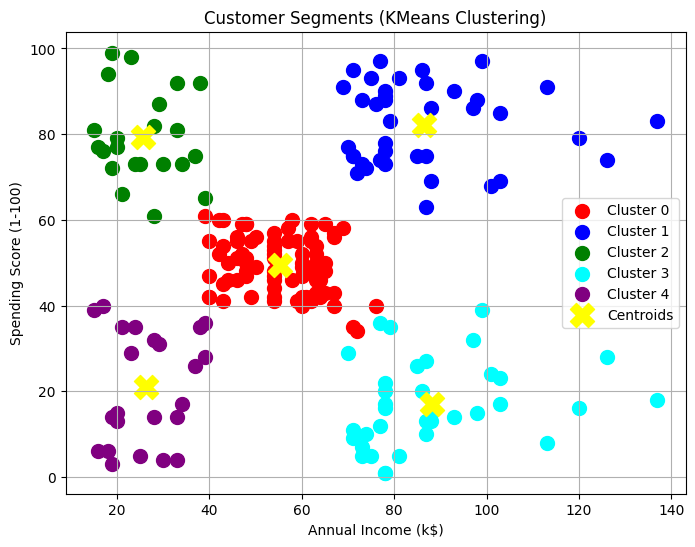

In [13]:
#  Visualize clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'purple']
for i in range(5):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'],
                X[y_kmeans == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')
plt.title('Customer Segments (KMeans Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()


In [14]:
# Evaluate using Silhouette Score
score = silhouette_score(X, y_kmeans)
print("Silhouette Score:", round(score, 2))

Silhouette Score: 0.55
